In [6]:
import sys
import pathlib
import os

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Local
cwd = pathlib.Path().resolve()
src = cwd.parent
root = src.parent
sys.path.append(str(src))
sys.path.append(str(root))

Load in all of the error data

In [8]:
# # It is probably easiest to put the file containing the errors in this same directory
# # each error file is an array with at least 2 inputs: 
# # * 1 for the initial condition (which should always be zero)
# # * 1 for the final condition (t=97)

fnames = os.listdir()
fnames.remove('best_dropout')
errors = {}

for item in fnames:
    if not '.ipynb' in item:
        print(item)
        errors[item] = {'data': np.loadtxt(item)}


CNN
CNN_PID
CNN_PIDPID
CNN_PIL
mlp_corners_aug_data
mlp_corners_orig_data
TempUNET
unet_32_64_128_orig_data80_multistep_skip0
unet_32_64_128_orig_data80_skip0
unet_32_64_128_orig_data80_skip10
unet_32_64_128_orig_data80_skip5
unet_32_64_aug_data400_skip0
unet_32_64_aug_data80_skip10
unet_32_64_aug_data80_skip5
unet_32_64_orig_data80_multistep_skip0
unet_32_64_orig_data80_skip0
unet_32_64_orig_data80_skip10
unet_32_64_orig_data80_skip5
unet_32_64_orig_data80_skip5_hardmask10
unet_32_64_orig_data80_skip5_hardmask5
unet_32_64_orig_data80_skip5_softmask
unet_source_aug_data80_multistep_skip0
unet_source_aug_skip5
unet_source_orig_data80_multistep_skip0
unet_source_orig_skip5


In [9]:
plt.style.use('seaborn')   # alternatively, use 'seaborn', 'ggplot', 'default'

In [10]:
# Plots the MSE in two seperate plots. The next cell plots in a single plot

# from random import shuffle

# fig, ax = plt.subplots(2, 1, figsize=(18, 18))
# plt.suptitle("Error accumulation for different models")

# colormap = plt.cm.get_cmap('tab20')

# c = 0
# k=0

# colors =list(np.arange(0, len(errors)))
# shuffle(colors)

# for key in list(errors.keys()):
#     data = errors[key]['data']

#     if len(data.shape) == 1:
#         t = np.arange(0, len(data))
#     else:
#         t = data[0,:]
#         data = data[1,:]

#     if 'CNN' in key:
#         i = 0
#     elif 'unet' in key:
#         i = 1

#     if 'mlp' in key:
#         ax[0].bar(96.5+c, data[1:], width=1, label=key)
#         c+=1

#     else:
#         ax[i].plot(t[1:], data[1:], label=key, marker='X', markersize=5, color=colormap(colors[k]/len(errors)))
#         k+=1

#     for i in [0, 1]:
#         ax[i].set_xlabel("timestep t")
#         ax[i].set_ylabel("MSE error (targets and outputs)")
#         ax[i].set_yscale('log')
#         ax[i].legend()

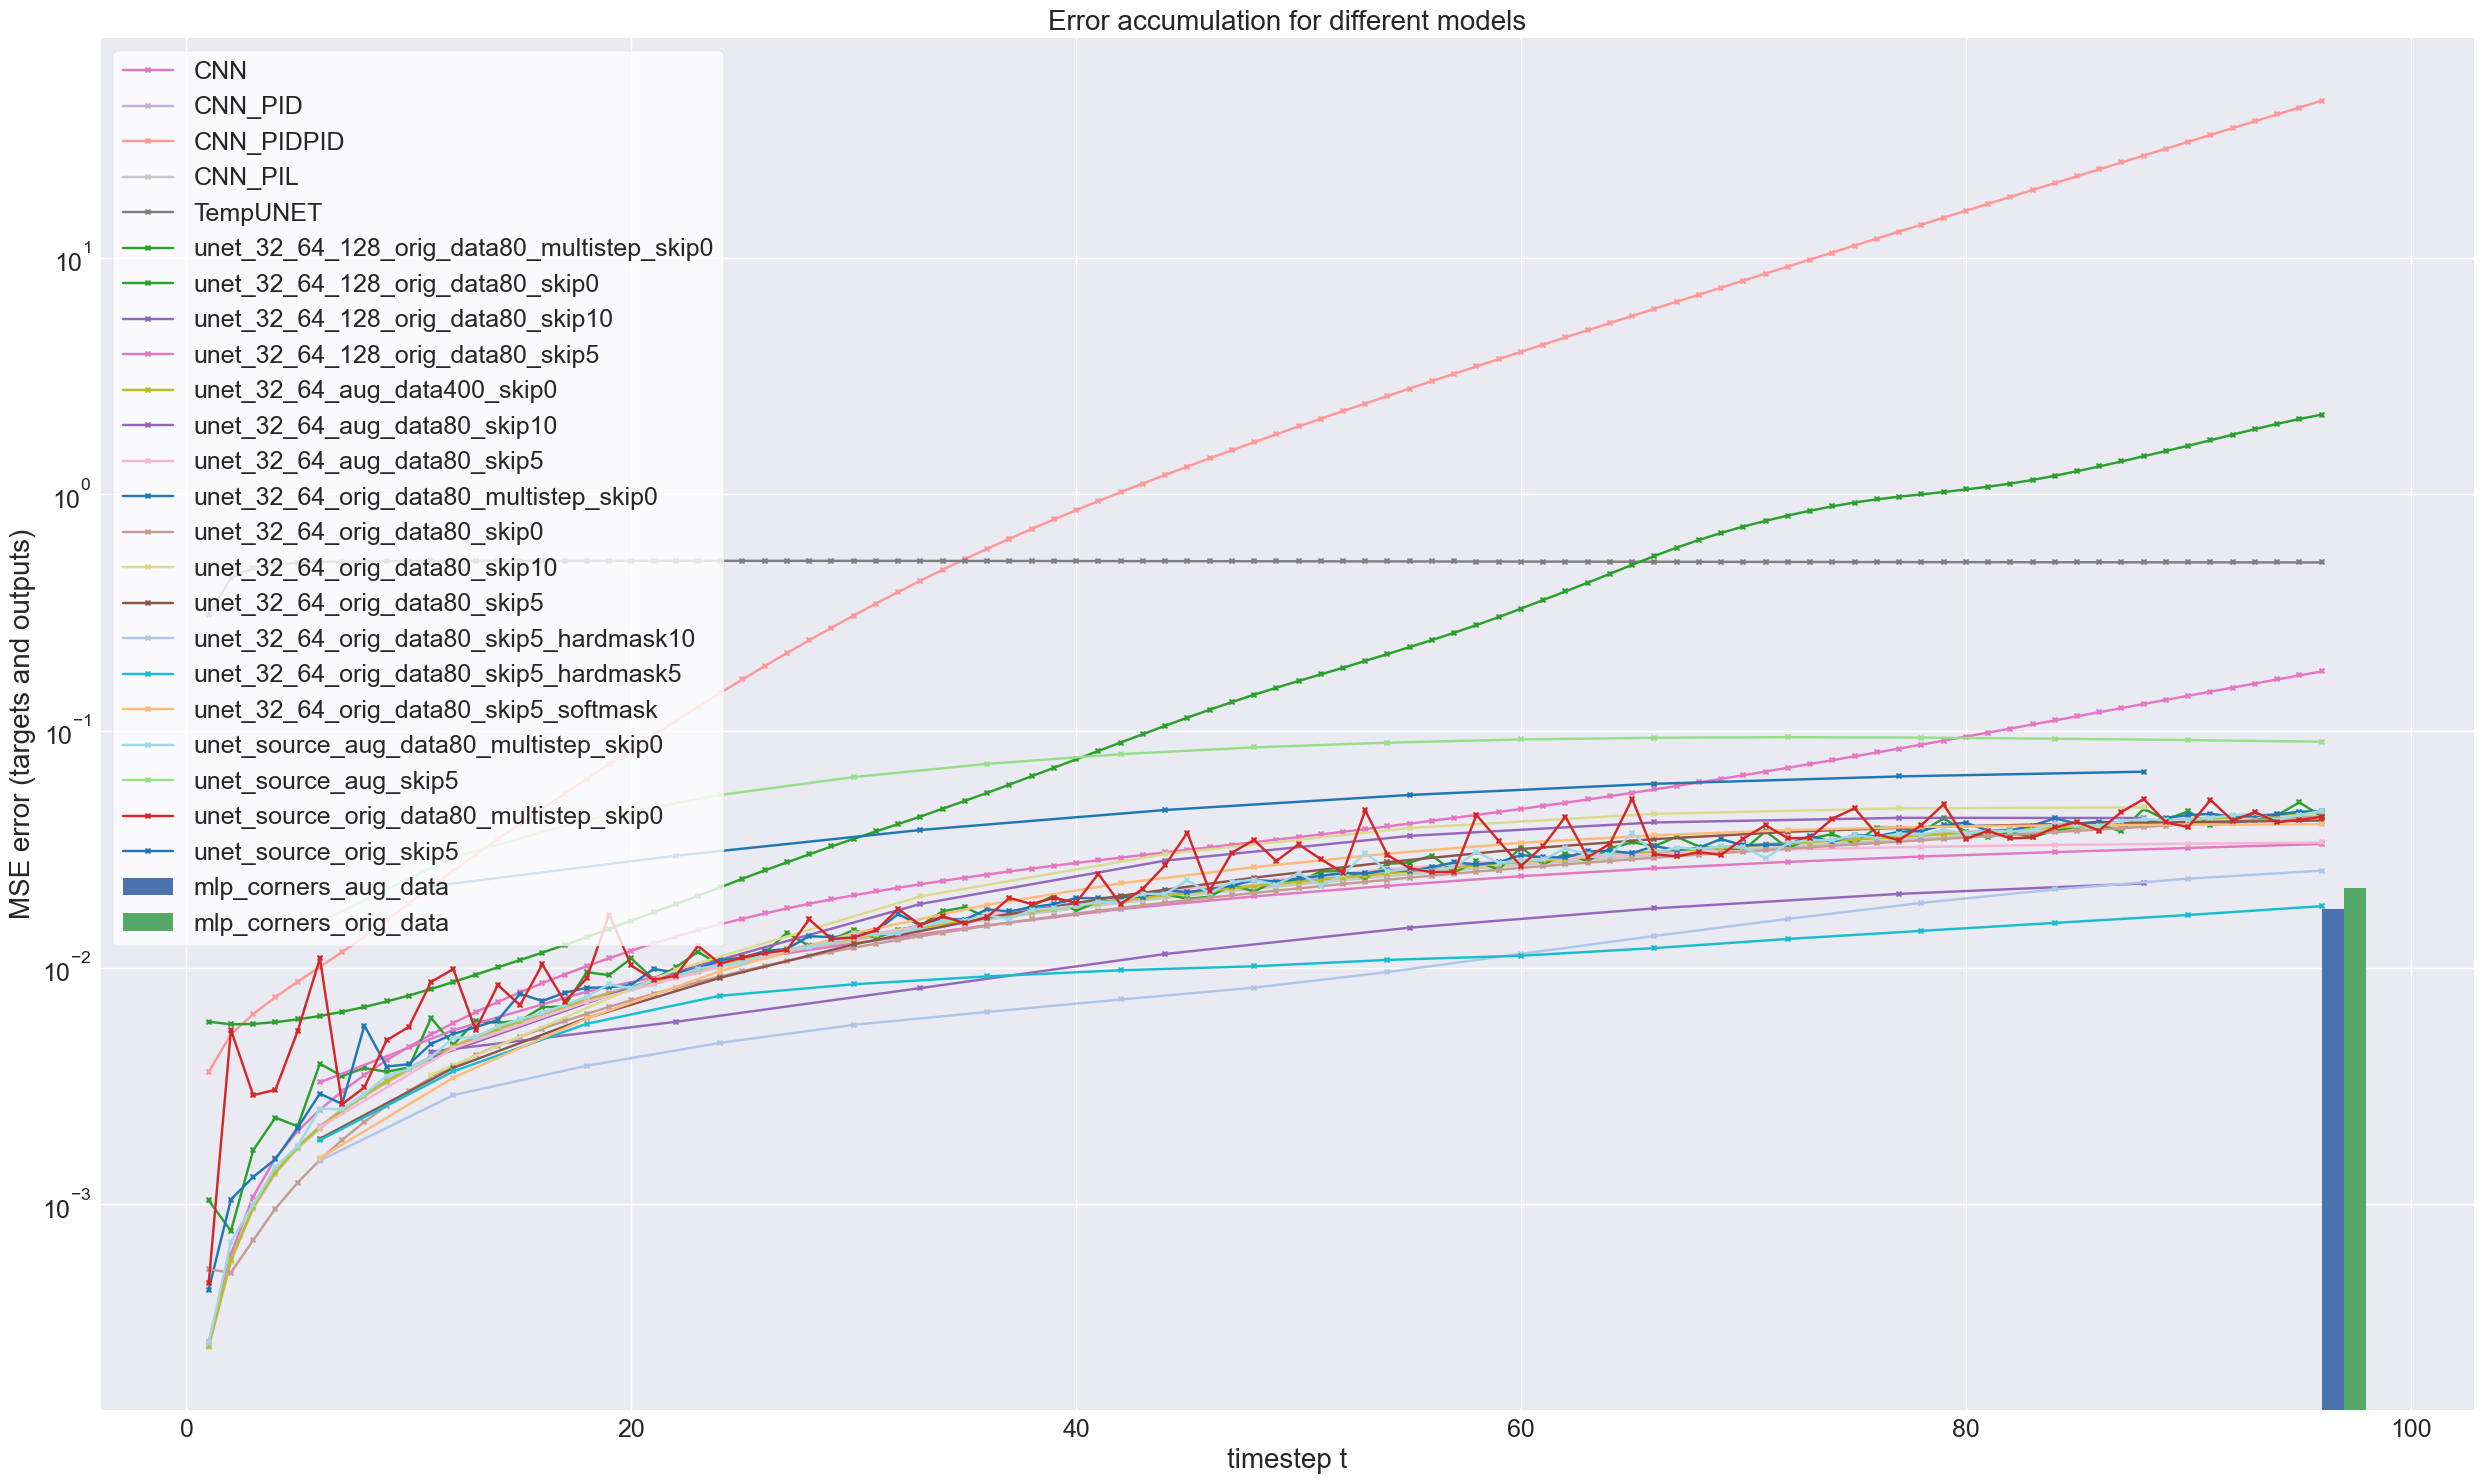

In [11]:
# Let's plot all of the model performances (i.e. averaged MSE for all test1 simulations) over time

from random import shuffle, seed
seed(42)

SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(25, 15))

colormap = plt.cm.get_cmap('tab20')

c = 0
k=0

colors =list(np.arange(0, len(errors)))
shuffle(colors)

for key in list(errors.keys()):
    data = errors[key]['data']

    if len(data.shape) == 1:
        t = np.arange(0, len(data))
    else:
        t = data[0,:]
        data = data[1,:]

    if 'CNN' in key:
        i = 0
    elif 'unet' in key:
        i = 1

    if 'mlp' in key:
        ax.bar(96.5+c, data[1:], width=1, label=key)
        c+=1

    else:
        ax.plot(t[1:], data[1:], label=key, marker='X', markersize=5, color=colormap(colors[k]/len(errors)))
        k+=1

plt.title("Error accumulation for different models")
ax.set_xlabel("timestep t")
ax.set_ylabel("MSE error (targets and outputs)")
ax.set_yscale('log')

legend = ax.legend(facecolor='white', framealpha=0.8, frameon=True, fancybox=True)

plt.tight_layout()

plt.show()

In [12]:
# best averaged MSE
number = 0

for key in list(errors.keys()):

    # mse is scaled temporally. The further it is away, the higher it's contribution
    data = errors[key]['data']

    if len(data.shape) == 1:
        t = np.arange(0, len(data))
    else:
        t = data[0,:]
        data = data[1,:]
    
    errors[key]['avg_MSE'] = np.sum(data[1:]) / len(data[1:])
    errors[key]['avg_MSE_scaled_with_time'] = np.sum(data[1:]*t[1:]) / len(data[1:])
    errors[key]['model_number'] = number
    number += 1

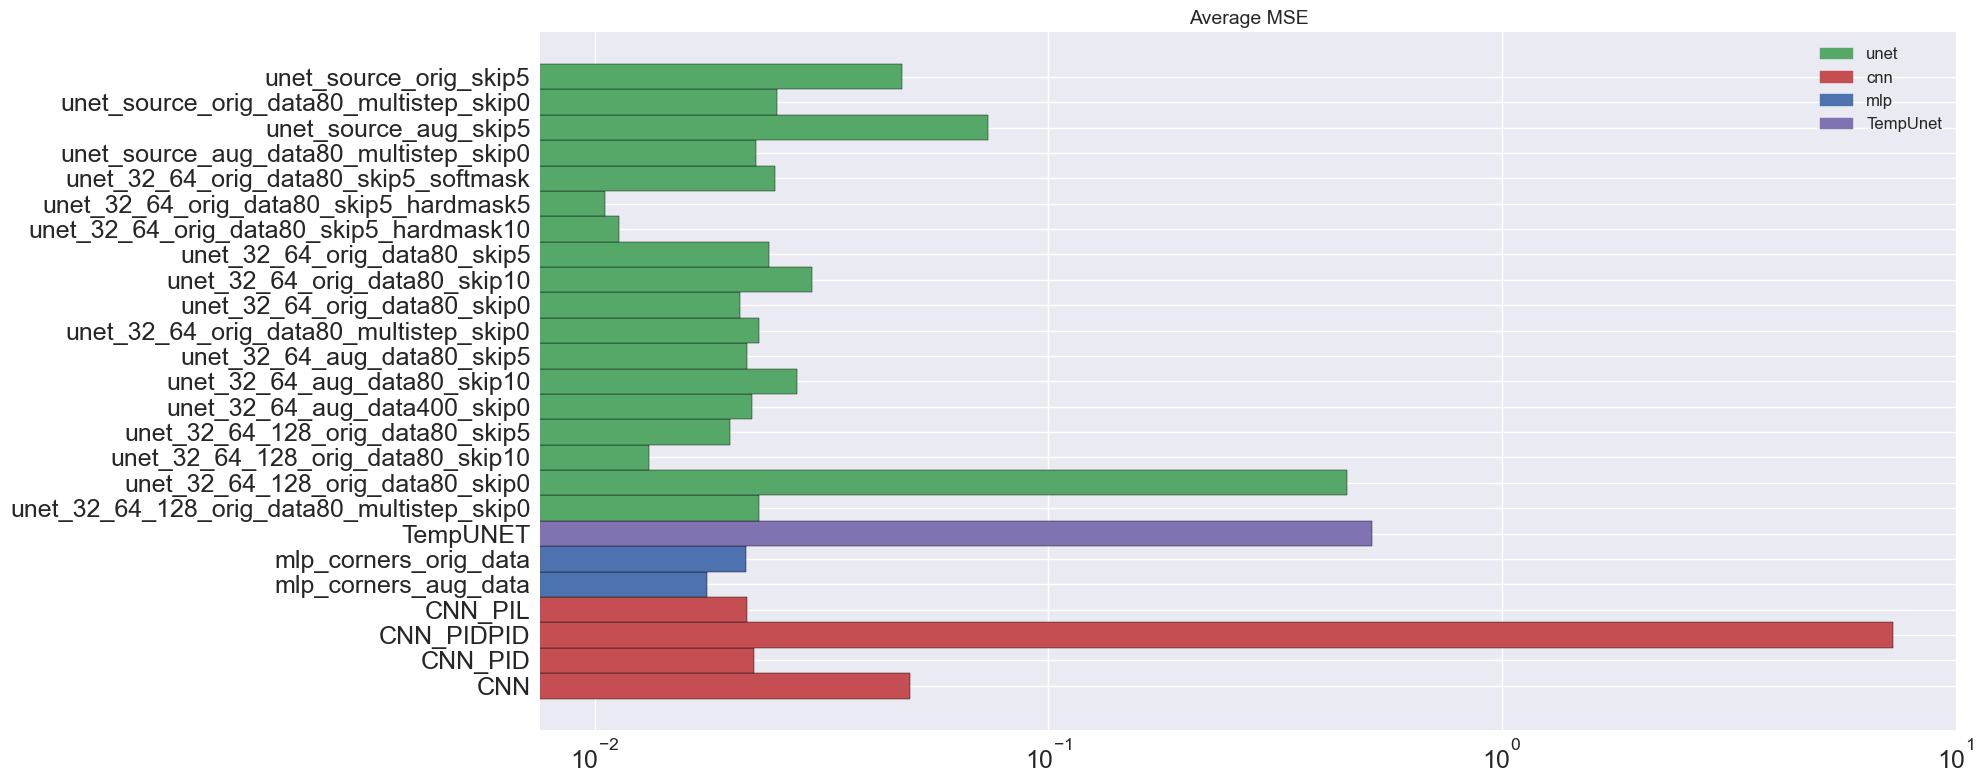

In [13]:
import matplotlib.patches as mpatches

coords = []
labels = []
MSE = []
MSE_scaled = []
colors = []

for key in list(errors.keys()):

    coords.append(errors[key]['model_number'])
    labels.append(key)
    MSE.append(errors[key]['avg_MSE'])
    MSE_scaled.append(errors[key]['avg_MSE_scaled_with_time'])

    if 'mlp' in key:
        colors.append('C0')
    elif 'unet' in key:
        colors.append('C1')
    elif 'CNN' in key:
        colors.append('C2')
    elif 'UNET' in key:
        colors.append('C3')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

fig, ax = plt.subplots( figsize=(20, 8))

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bars1 = ax.barh(np.array(coords), MSE, height=1, color=colors, edgecolor='k')

mlp_patch = mpatches.Patch(color='C0', label='mlp')
cnn_patch = mpatches.Patch(color='C2', label='cnn')
unet_patch = mpatches.Patch(color='C1', label='unet')
tempunet_patch = mpatches.Patch(color='C3', label='TempUnet')

ax.set_title('Average MSE')
ax.set_xscale('log')
ax.set_yticks(coords, labels)
ax.legend(handles=[unet_patch, cnn_patch, mlp_patch, tempunet_patch])

plt.tight_layout()

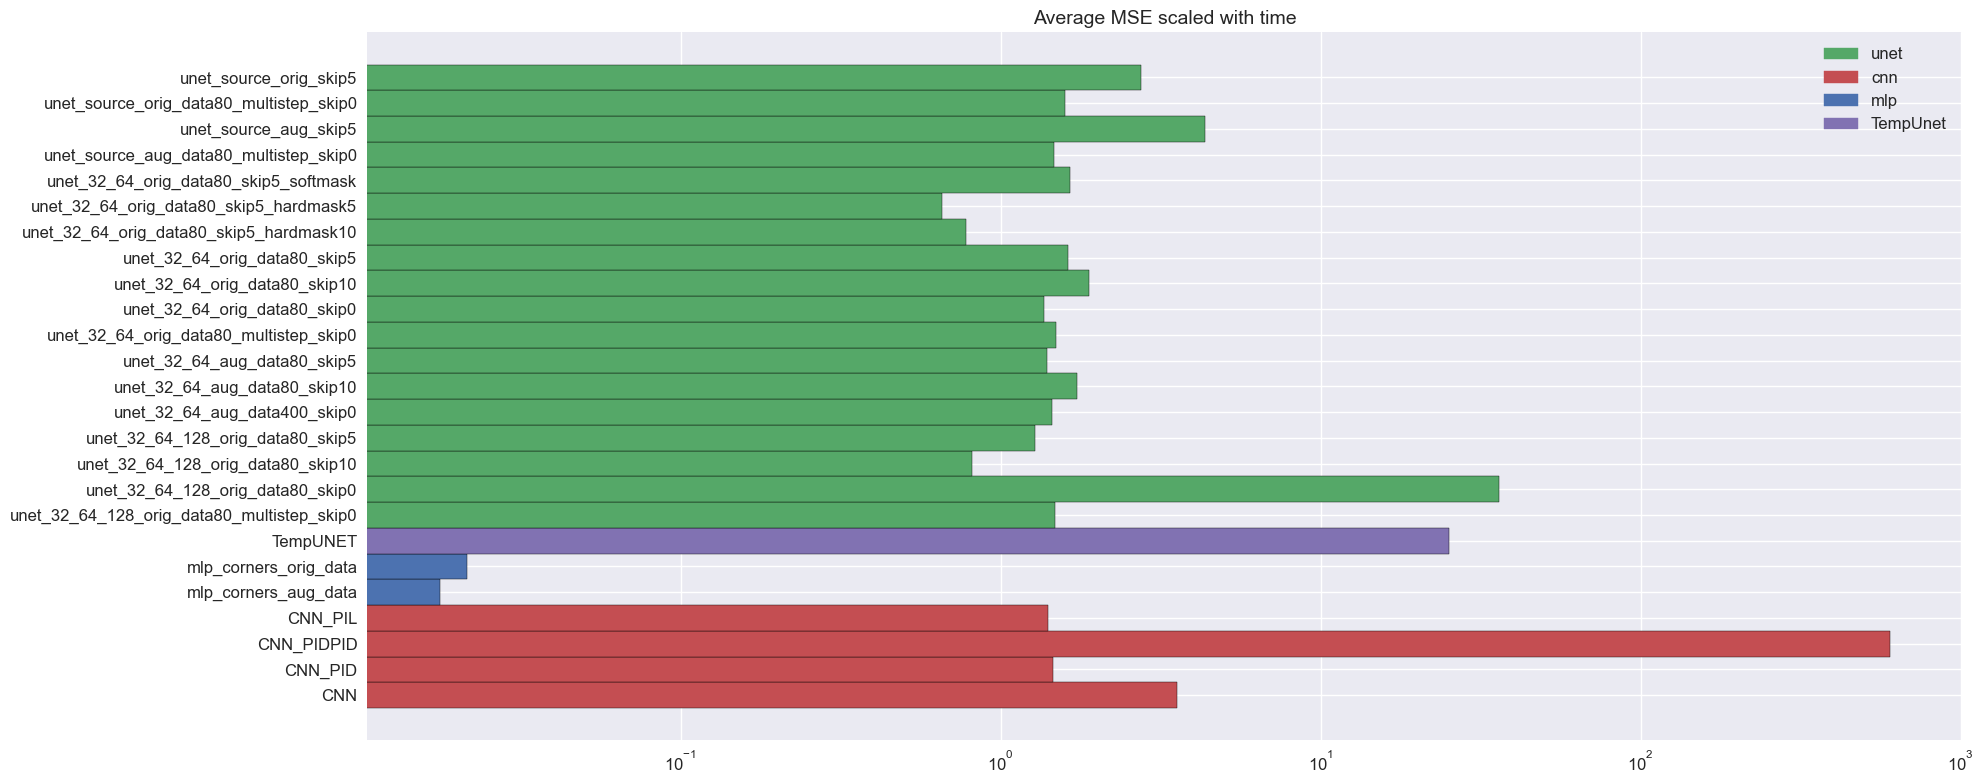

In [14]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots( figsize=(20, 8))

bars2 = ax.barh(np.array(coords), MSE_scaled, height=1, color=colors, edgecolor='k')

mlp_patch = mpatches.Patch(color='C0', label='mlp')
cnn_patch = mpatches.Patch(color='C2', label='cnn')
unet_patch = mpatches.Patch(color='C1', label='unet')
tempunet_patch = mpatches.Patch(color='C3', label='TempUnet')


ax.set_title('Average MSE scaled with time')
ax.set_xscale('log')
ax.set_yticks(coords, labels)
ax.legend(handles=[unet_patch, cnn_patch, mlp_patch, tempunet_patch])

plt.tight_layout()

In [15]:
# We now know the best model, and add dropout to it

fnames = os.listdir("./best_dropout")
errors_best = {}

for item in fnames:
    if not '.ipynb' in item:
        print(item)
        errors_best[item] = {'data': np.loadtxt("./best_dropout/" + item)}


unet_32_64_128_orig_data80_skip5_hardmask5_drop25
unet_32_64_128_orig_data80_skip5_hardmask5_drop50
unet_32_64_orig_data80_skip5_hardmask5
unet_32_64_orig_data80_skip5_hardmask5_drop25
unet_32_64_orig_data80_skip5_hardmask5_drop50


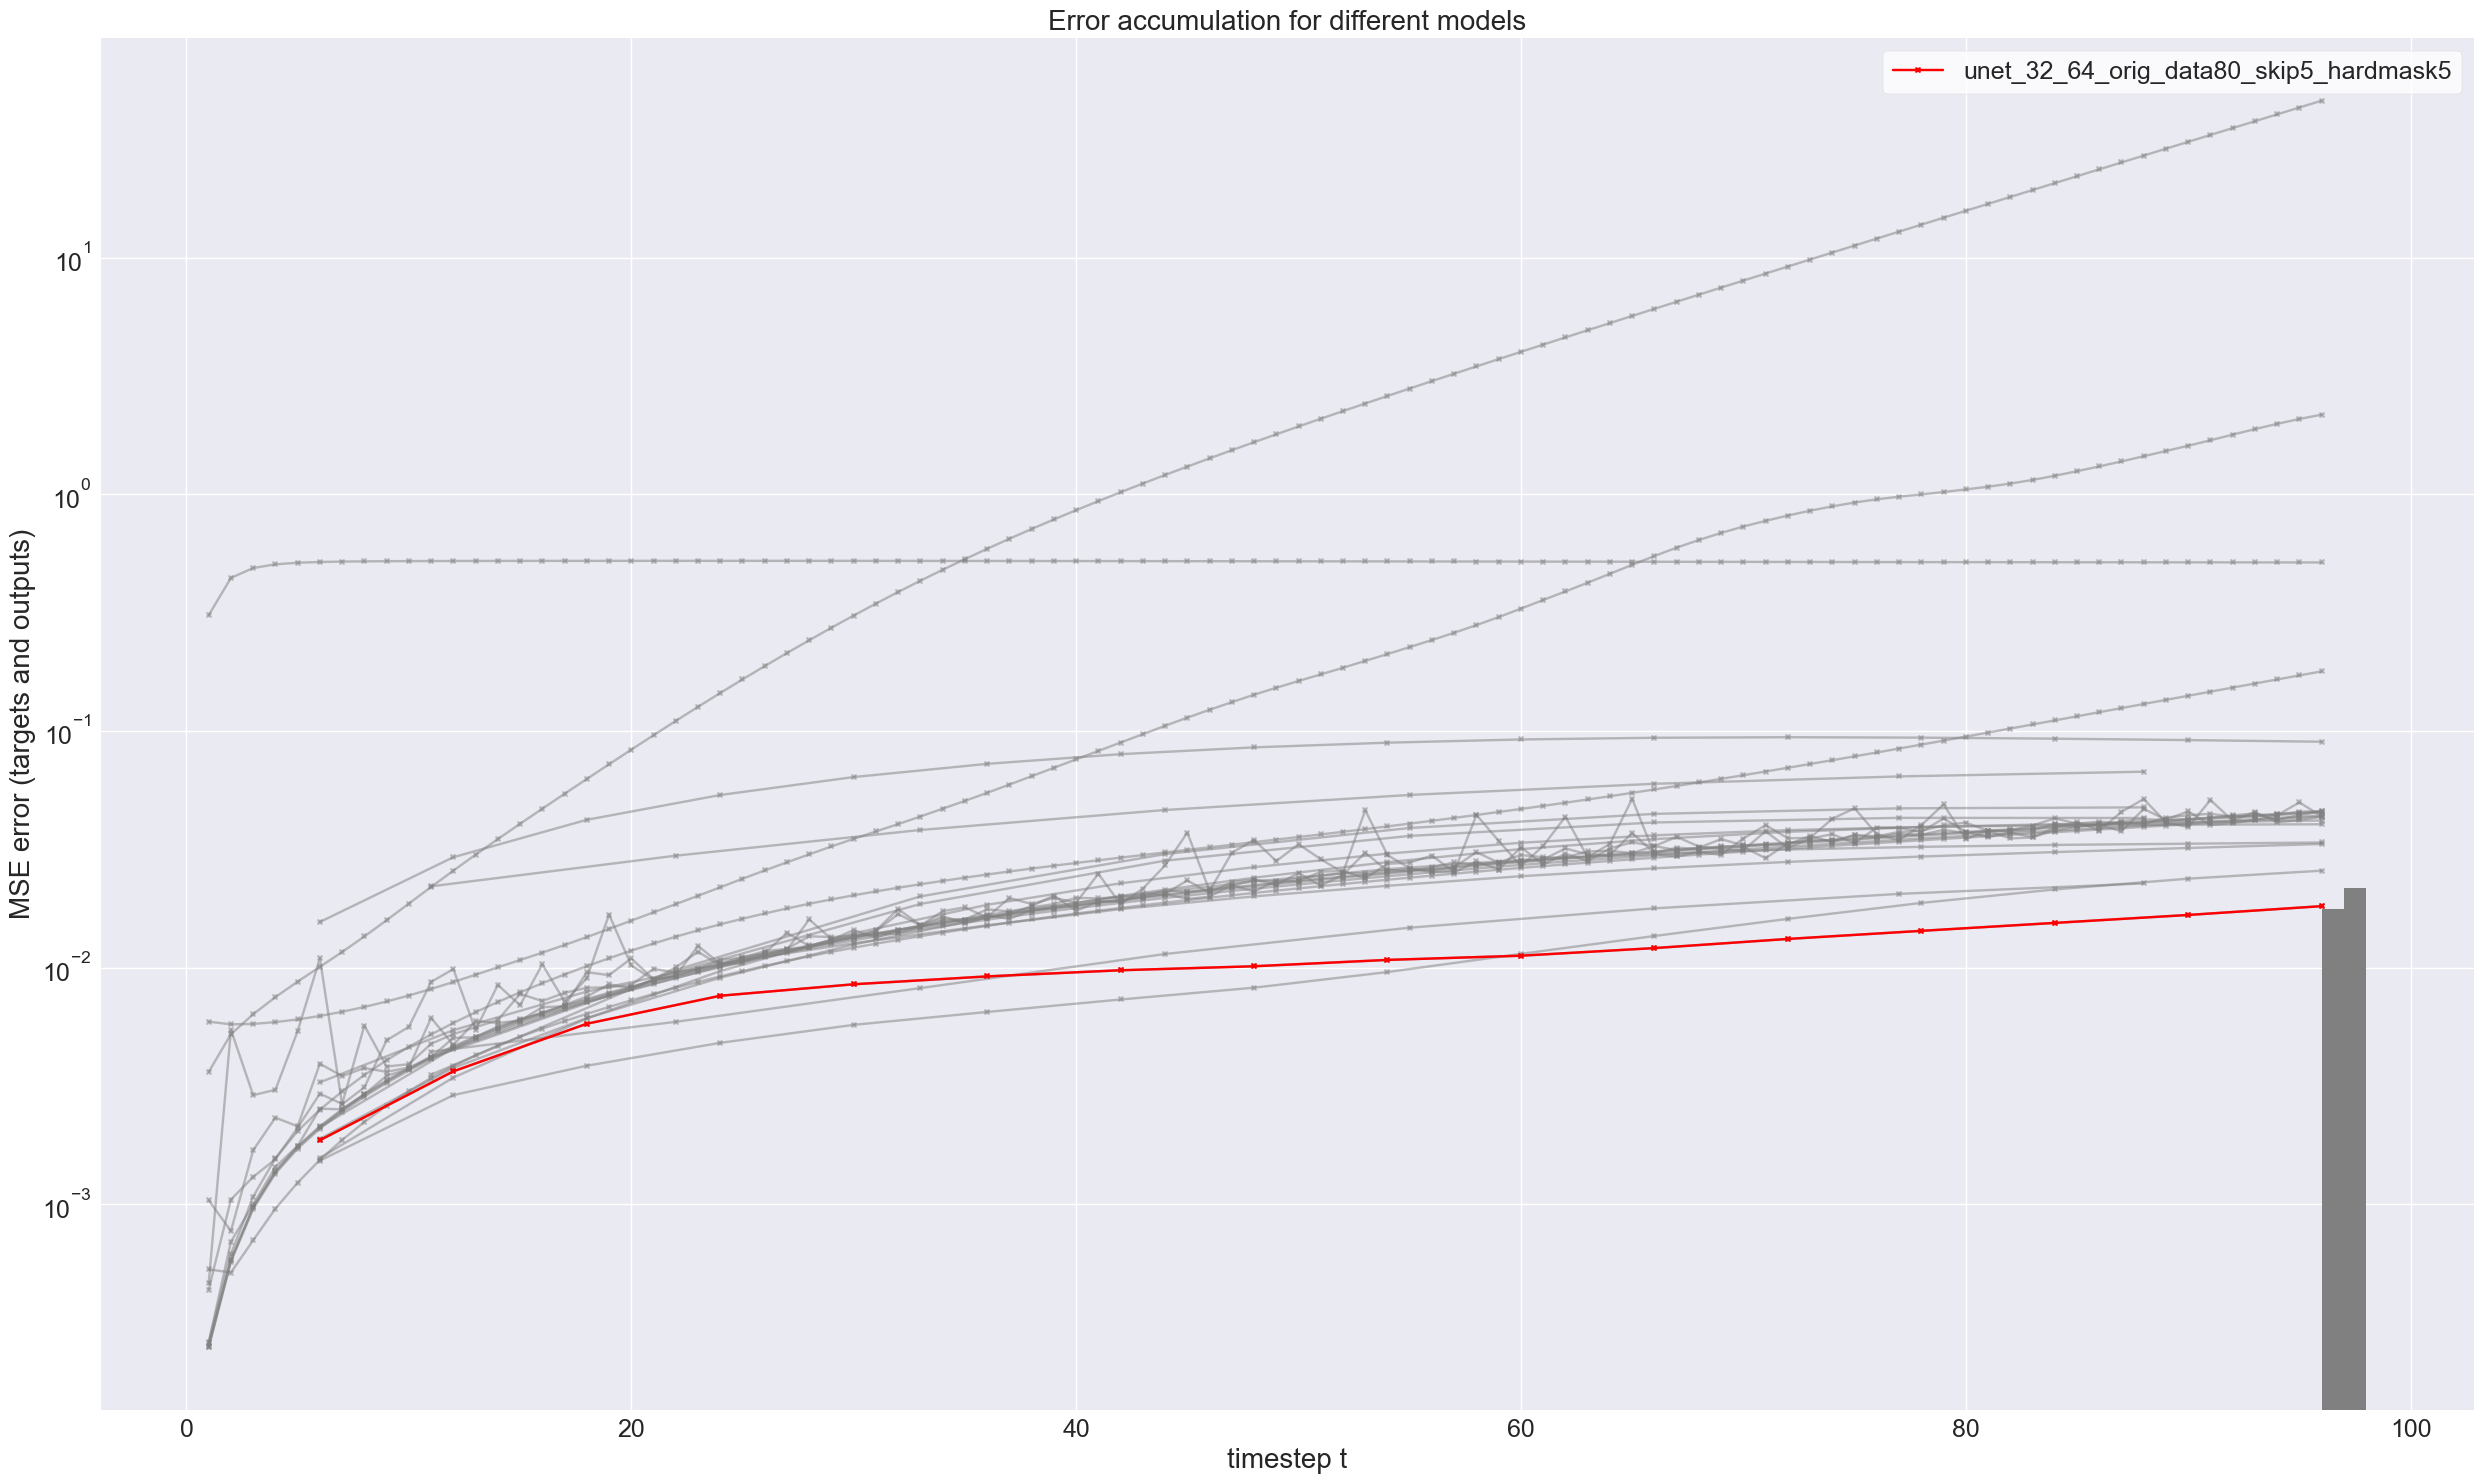

In [16]:
# We select the best model from this

SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(25, 15))

colormap = plt.cm.get_cmap('tab20')

c = 0
k=0

colors =list(np.arange(0, len(errors)))
shuffle(colors)

for key in list(errors.keys()):
    data = errors[key]['data']

    if len(data.shape) == 1:
        t = np.arange(0, len(data))
    else:
        t = data[0,:]
        data = data[1,:]

    if 'CNN' in key:
        i = 0
    elif 'unet' in key:
        i = 1

    if 'mlp' in key:
        ax.bar(96.5+c, data[1:], width=1, color='grey')
        c+=1

    else:
        ax.plot(t[1:], data[1:], marker='X', markersize=5, color='grey', alpha=0.5)
        k+=1
k=0

for key in list(errors_best.keys()):
    if key=="unet_32_64_orig_data80_skip5_hardmask5":
        data = errors_best[key]['data']
        t = data[0,:]
        data = data[1,:]
        ax.plot(t[1:], data[1:], label=key, marker='X', markersize=5, color='r')
        k+=1

plt.title("Error accumulation for different models")
ax.set_xlabel("timestep t")
ax.set_ylabel("MSE error (targets and outputs)")
ax.set_yscale('log')

legend = ax.legend(facecolor='white', framealpha=0.8, frameon=True, fancybox=True)

plt.tight_layout()

plt.show()

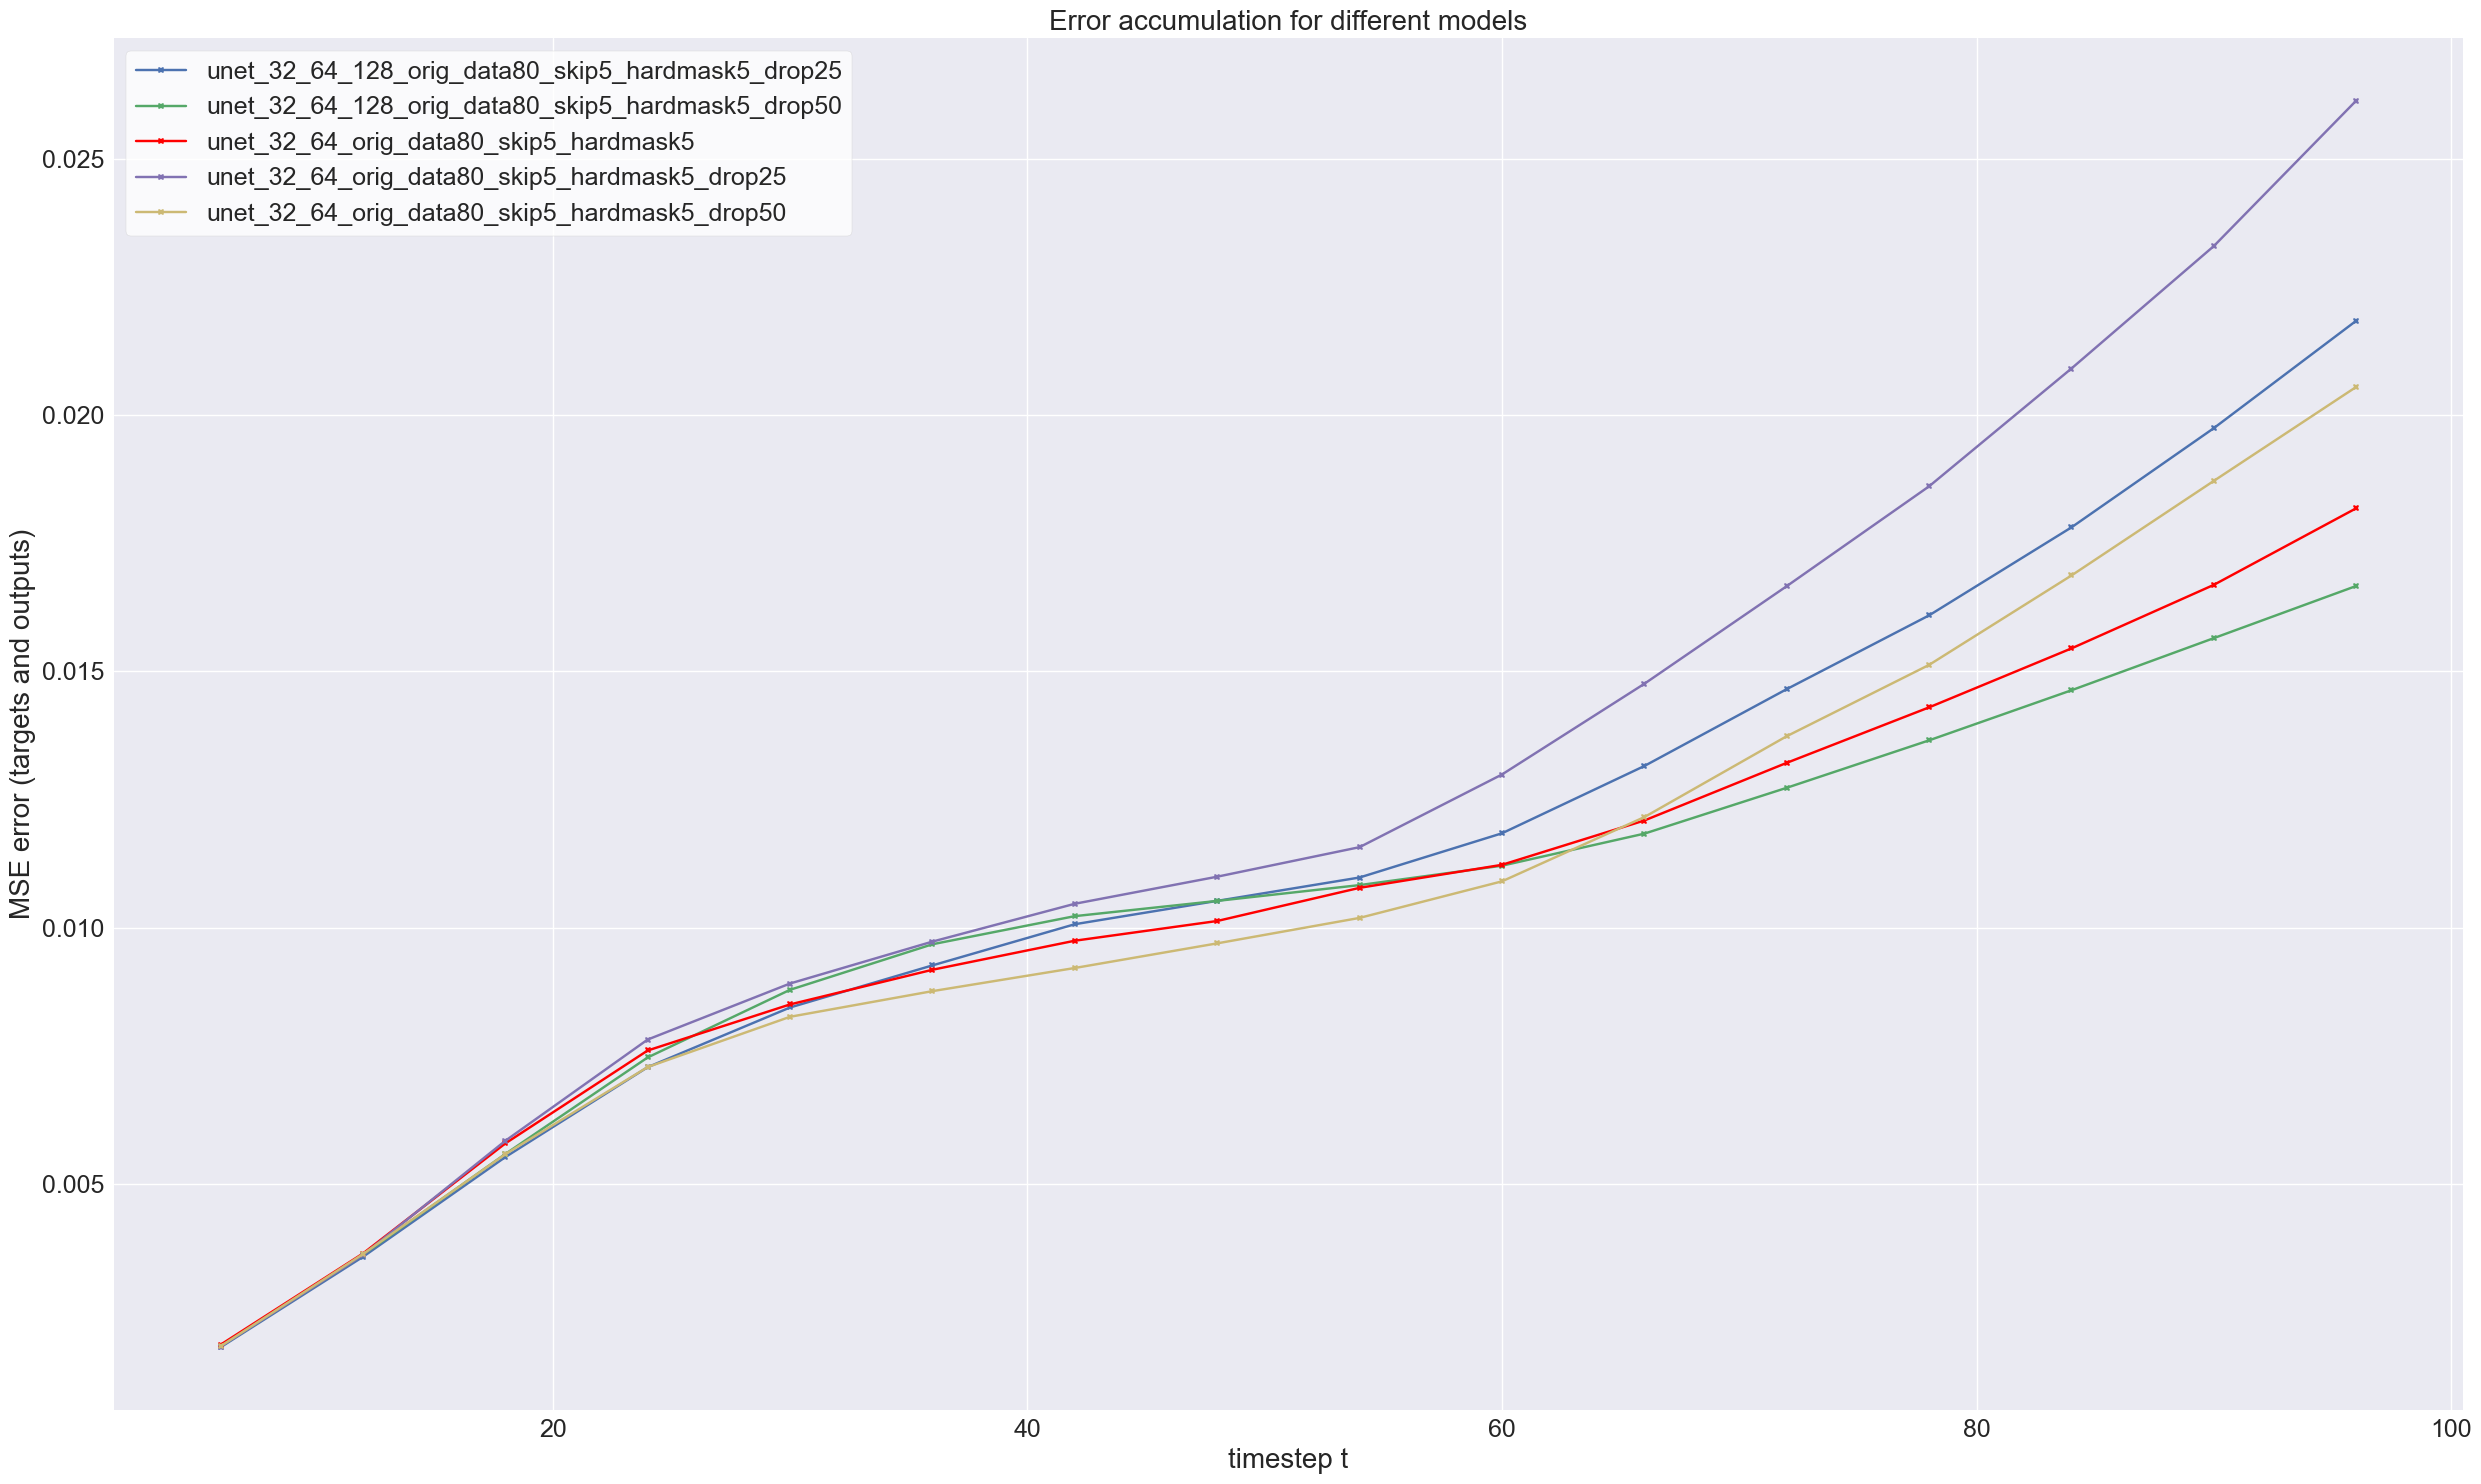

In [17]:
# Let's compare dropout models

SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(25, 15))

k=0

colors = [f'C{i}' for i in range(0,5+1)]

for key in list(errors_best.keys()):
    data = errors_best[key]['data']
    t = data[0,:]
    data = data[1,:]
    if key=="unet_32_64_orig_data80_skip5_hardmask5":
        ax.plot(t[1:], data[1:], label=key, marker='X', markersize=5, color='r')
    else:
        ax.plot(t[1:], data[1:], label=key, marker='X', markersize=5, color=colors[k])
    k+=1

plt.title("Error accumulation for different models")
ax.set_xlabel("timestep t")
ax.set_ylabel("MSE error (targets and outputs)")
# ax.set_yscale('log')

legend = ax.legend(facecolor='white', framealpha=0.8, frameon=True, fancybox=True)

plt.tight_layout()

plt.show()

In [18]:
# best averaged MSE
number = 0

for key in list(errors_best.keys()):

    # mse is scaled temporally. The further it is away, the higher it's contribution
    data = errors_best[key]['data']

    if len(data.shape) == 1:
        t = np.arange(0, len(data))
    else:
        t = data[0,:]
        data = data[1,:]
    
    errors_best[key]['avg_MSE'] = np.sum(data[1:]) / len(data[1:])
    errors_best[key]['avg_MSE_scaled_with_time'] = np.sum(data[1:]*t[1:]) / len(data[1:])
    errors_best[key]['model_number'] = number
    number += 1

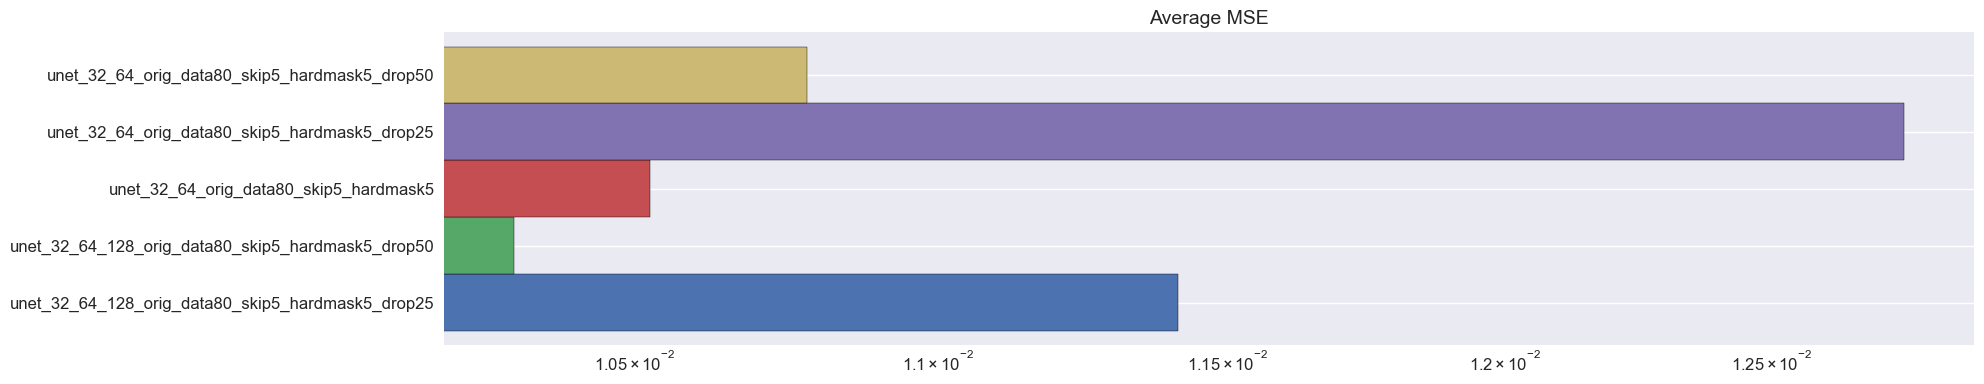

In [19]:
# Bar plot for MSE of dropout models

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

coords = []
labels = []
MSE = []
MSE_scaled = []
colors = [f"C{i}" for i in range(0,5+1)]

for key in list(errors_best.keys()):

    coords.append(errors_best[key]['model_number'])
    labels.append(key)
    MSE.append(errors_best[key]['avg_MSE'])
    MSE_scaled.append(errors_best[key]['avg_MSE_scaled_with_time'])

fig, ax = plt.subplots( figsize=(20, 4))

bars1 = ax.barh(np.array(coords), MSE, height=1, color=colors, edgecolor='k')

ax.set_title('Average MSE')
ax.set_xscale('log')
ax.set_yticks(coords, labels)

plt.tight_layout()

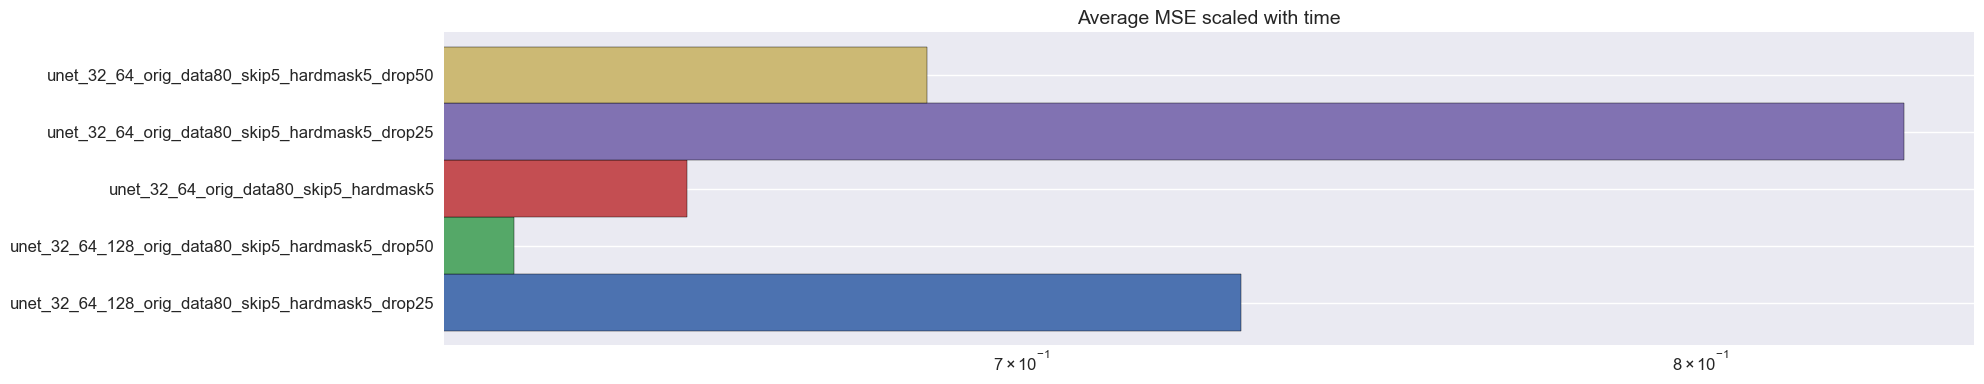

In [20]:
# Bar plot for time scaled MSE of dropout models

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots( figsize=(20, 4))

bars1 = ax.barh(np.array(coords), MSE_scaled, height=1, color=colors, edgecolor='k')

ax.set_title('Average MSE scaled with time')
ax.set_xscale('log')
ax.set_yticks(coords, labels)

plt.tight_layout()